# Árvore de Decisão

***

In [94]:
pip install ucimlrepo

## Importando bibliotecas

In [95]:
#Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

#Acesso ao dataset
from ucimlrepo import fetch_ucirepo

#Classes do modelo de aprendizado
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

#Funções de avaliação dos modelos
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Dataset Iris

In [96]:
from ucimlrepo import fetch_ucirepo

#Definindo semente
seed=42

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

dataset = pd.concat([X,y], axis=1)

In [97]:
dataset.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [98]:
#Mapeando os valores de genero para inteiro
dataset['class'] = pd.factorize(dataset['class'])[0]
dataset['class'].value_counts()

,count
class,
0,50
1,50
2,50


### Separando o conjunto de dados

In [99]:
# Seleciona todos os campos menos a classe alvo para a variável "X".
X = dataset.iloc[:,:-1]
y = dataset.loc[:,"class"]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


## Classificação

[Documentação](https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart)

In [100]:
#scikit-learn usa uma versão otimizada do algoritmo CART (similar ao C4.5)
model = DecisionTreeClassifier(max_depth=3, random_state=seed)
#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [101]:
plt.figure(figsize=(100,100))

# Retorna uma lista contendo os dados para as caixas de anotação que compõem a árvore
tree = plot_tree(model, feature_names=["sepal length", "sepal width", "petal length", "petal width"],
                 class_names=['setosa', 'versicolor', 'virginica'], filled=True)

### E se mudarmos os parâmetros?

**Criterion** é a função para medir a qualidade de uma divisão. Por padrão o critério usado é o coeficiente gini [Link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).

- coeficiente gini: Mede a probabilidade de uma variável específica ser classificada erroneamente quando escolhida aleatoriamente. $gini(p) = 1-\sum_{i=1}^n (p_i)^2$

- entropia: Entropia é o grau de incerteza, impureza ou desordem de uma variável aleatória ou uma medida de pureza.  
    


In [102]:
for i, criterion in enumerate(['gini', 'entropy']):
    print(criterion.upper()+ "\n")
    model = DecisionTreeClassifier(criterion=criterion, max_depth=4)
    #treinando o modelo
    model.fit(X_train, y_train)

    #predição
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))

plt.show()

GINI

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

ENTROPY

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



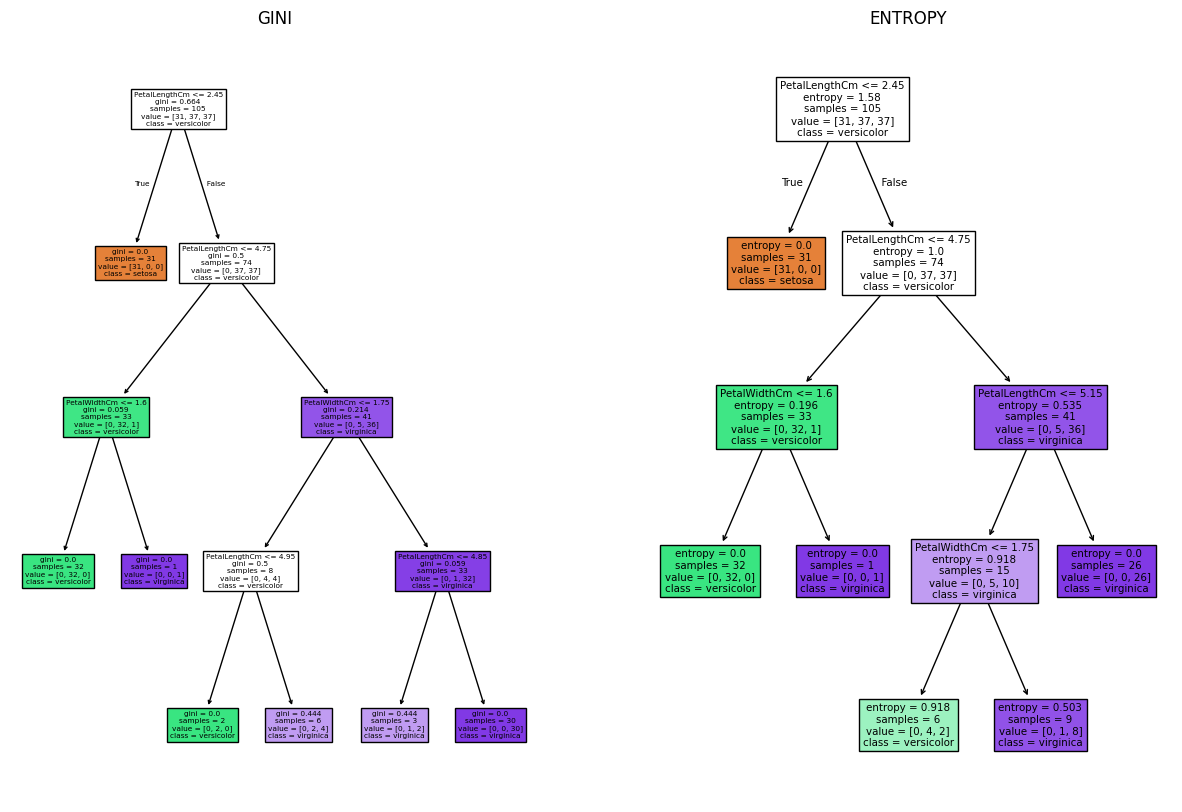

In [103]:
fig, ax = plt.subplots(1,2, figsize=(15,10))

for i, criterion in enumerate(['gini', 'entropy']):
    model = DecisionTreeClassifier(criterion=criterion, max_depth=4, random_state=seed)
    #treinando o modelo
    model.fit(X_train, y_train)

    tree = plot_tree(model, ax=ax[i],feature_names=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"],
                 class_names=['setosa', 'versicolor', 'virginica'], filled=True)
    ax[i].set_title(criterion.upper())
plt.show()

**max_depth** determina a profundidade máxima da árvore

In [104]:
for i, max_depth in enumerate([2,3,4]):
    print(f"MAX_DEPTH - {max_depth} \n ")
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=seed)
    #treinando o modelo
    model.fit(X_train, y_train)

    #predição
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))

plt.show()

MAX_DEPTH - 2 
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

MAX_DEPTH - 3 
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

MAX_DEPTH - 4 
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00 

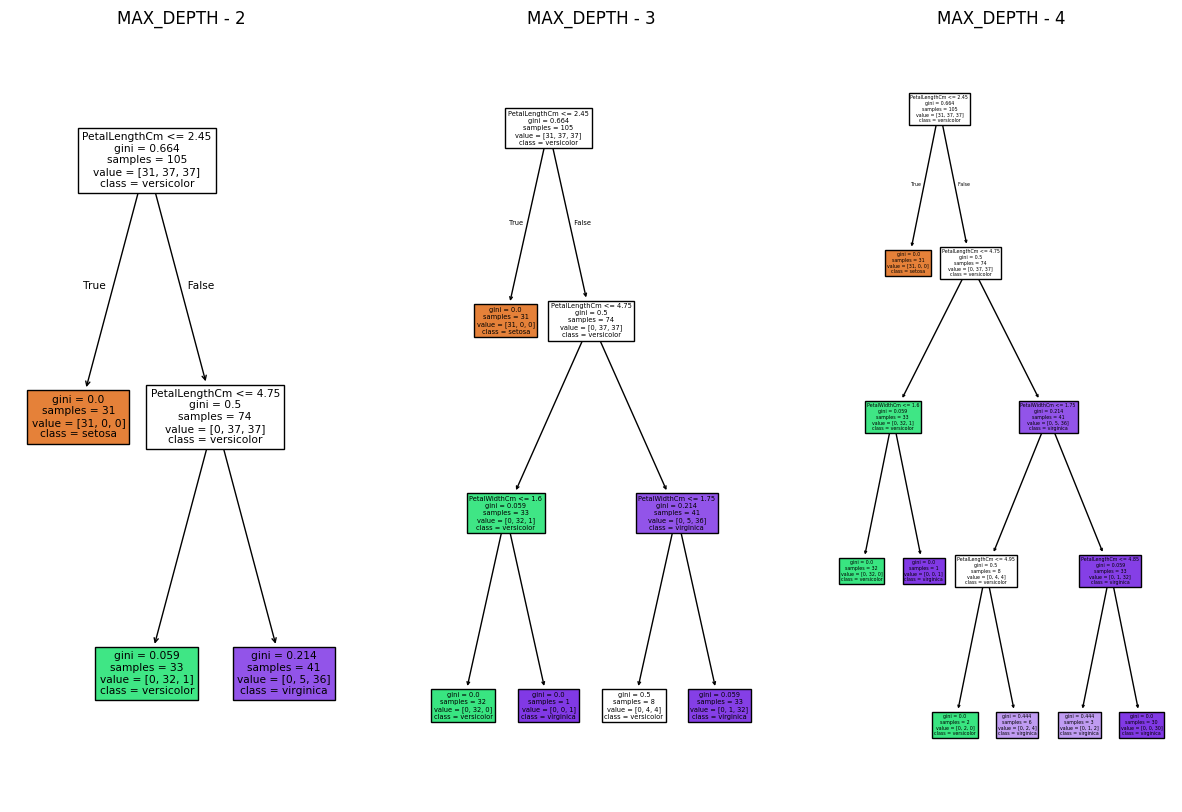

In [105]:
fig, ax = plt.subplots(1,3, figsize=(15,10))

for i, max_depth in enumerate([2,3,4]):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=seed)
    #treinando o modelo
    model.fit(X_train, y_train)

    tree = plot_tree(model, ax=ax[i],feature_names=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"],
                 class_names=['setosa', 'versicolor', 'virginica'], filled=True)
    ax[i].set_title(f"MAX_DEPTH - {max_depth}")

plt.show()

###Dataset Breast Cancer Wisconsin

In [106]:
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

cancer_dataset = pd.concat([X,y], axis=1)
cancer_dataset

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [107]:
# Seleciona todos os campos menos a classe alvo para a variável "X".
X = cancer_dataset.iloc[:,:-1]
y = cancer_dataset.loc[:,"Diagnosis"]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
X_train.shape, X_test.shape

((398, 30), (171, 30))

In [108]:
model = DecisionTreeClassifier(random_state=seed)
#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.97      0.94      0.95       108
           M       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



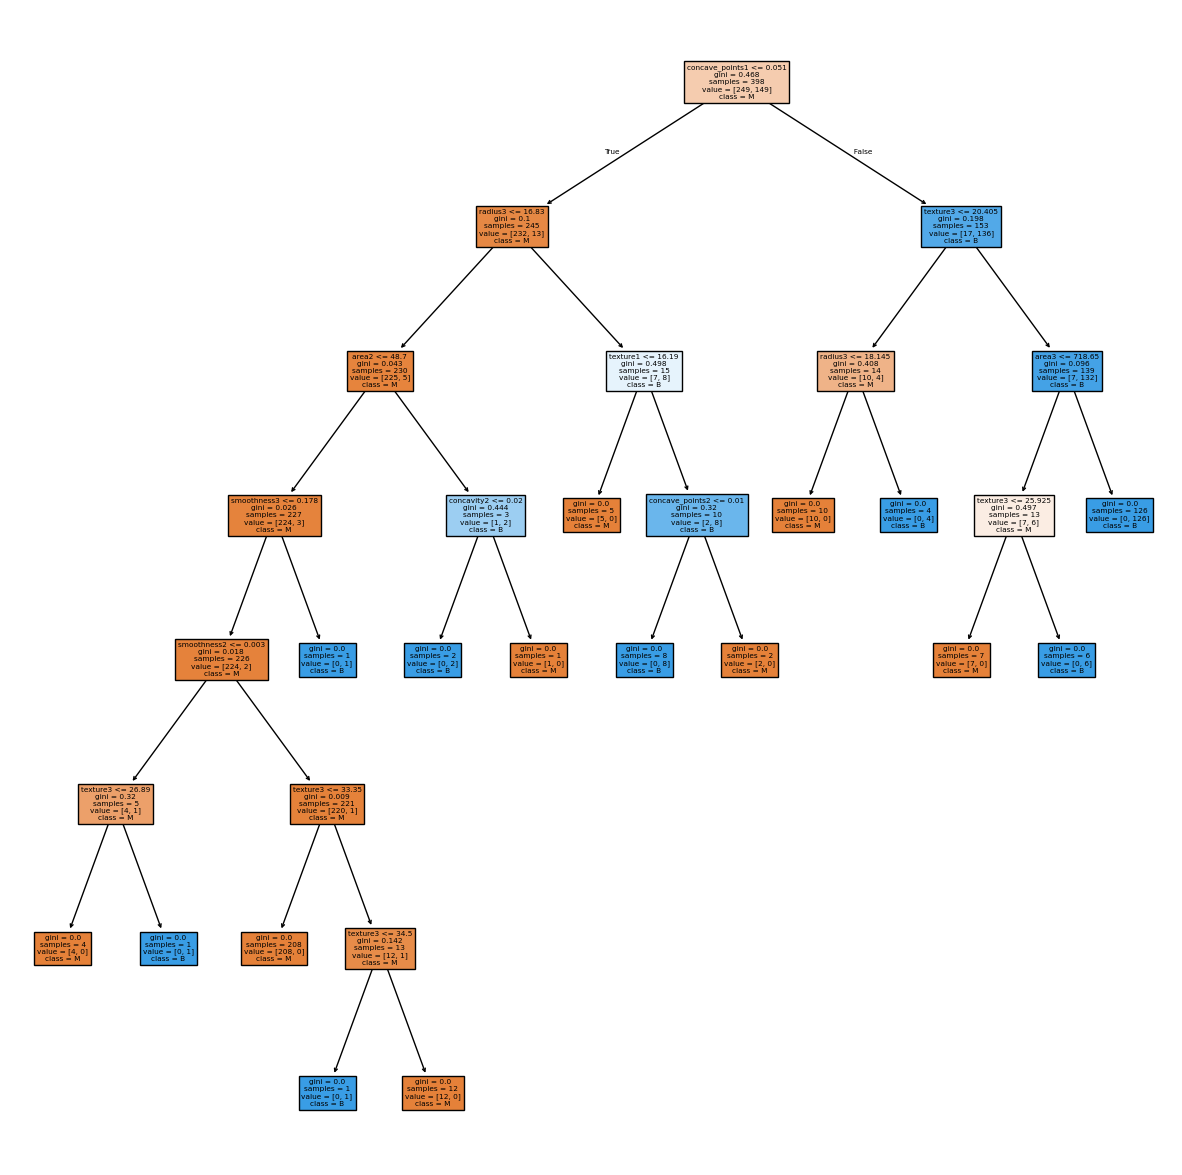

In [109]:
plt.figure(figsize=(15,15))
tree = plot_tree(model, feature_names=X.columns, class_names=['M', 'B'], filled=True)
plt.show()

Random Forest desempenha melhor do que o DT?

In [110]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=seed)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



## Regressão

**House-16H dataset**:

A tarefa é prever o preço médio da casa na região com base na composição demográfica e no estado do mercado imobiliário na região.

[Saiba mais aqui](https://sci2s.ugr.es/keel/dataset.php?cod=95#sub1)

In [111]:
dataset_R = pd.read_csv("https://raw.githubusercontent.com/gabrielh10/ml_practice_tutoring/main/datasets/house.csv")

In [112]:
dataset_R.head()

,Price,P1,P5p1,P6p2,P11p4,P14p9,P15p1,P15p3,P16p2,P18p2,P27p4,H2p2,H8p2,H10p1,H13p1,H18pA,H40p4
0,14999,219,0.506849,0.031963,0.146119,0.101852,0.876712,0.000000,0.746988,0.012048,0.060241,0.231482,0.024096,0.987952,0.351852,0.000000,0.800000
1,106200,2273,0.495381,0.018918,0.067312,0.045336,0.794545,0.016718,0.641053,0.002105,0.076842,0.064961,0.017895,0.997895,0.170276,0.054217,0.258064
2,14999,564,0.457447,0.058511,0.299645,0.238562,0.764184,0.010638,0.567273,0.003636,0.014545,0.140625,0.054545,0.996364,0.381250,0.056180,1.000000
3,29900,620,0.495161,0.003226,0.104839,0.086262,0.909677,0.000000,0.792793,0.009009,0.027027,0.051282,0.004504,0.995495,0.183761,0.162791,0.000000
4,85900,3809,0.491730,0.205303,0.107115,0.085744,0.899449,0.000000,0.766566,0.008283,0.039910,0.017024,0.200301,0.985693,0.198372,0.106557,0.666667


In [113]:
X = dataset_R.iloc[:,1:-1]
y = dataset_R.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [114]:
regression_tree = DecisionTreeRegressor(max_depth=3, random_state=seed)
regression_tree.fit(X_train, y_train)

y_pred = regression_tree.predict(X_test)

#Coeficiente de determinação - melhor valor é 1
print("R2_score:", r2_score(y_test, y_pred))

R2_score: 0.3482240483071549


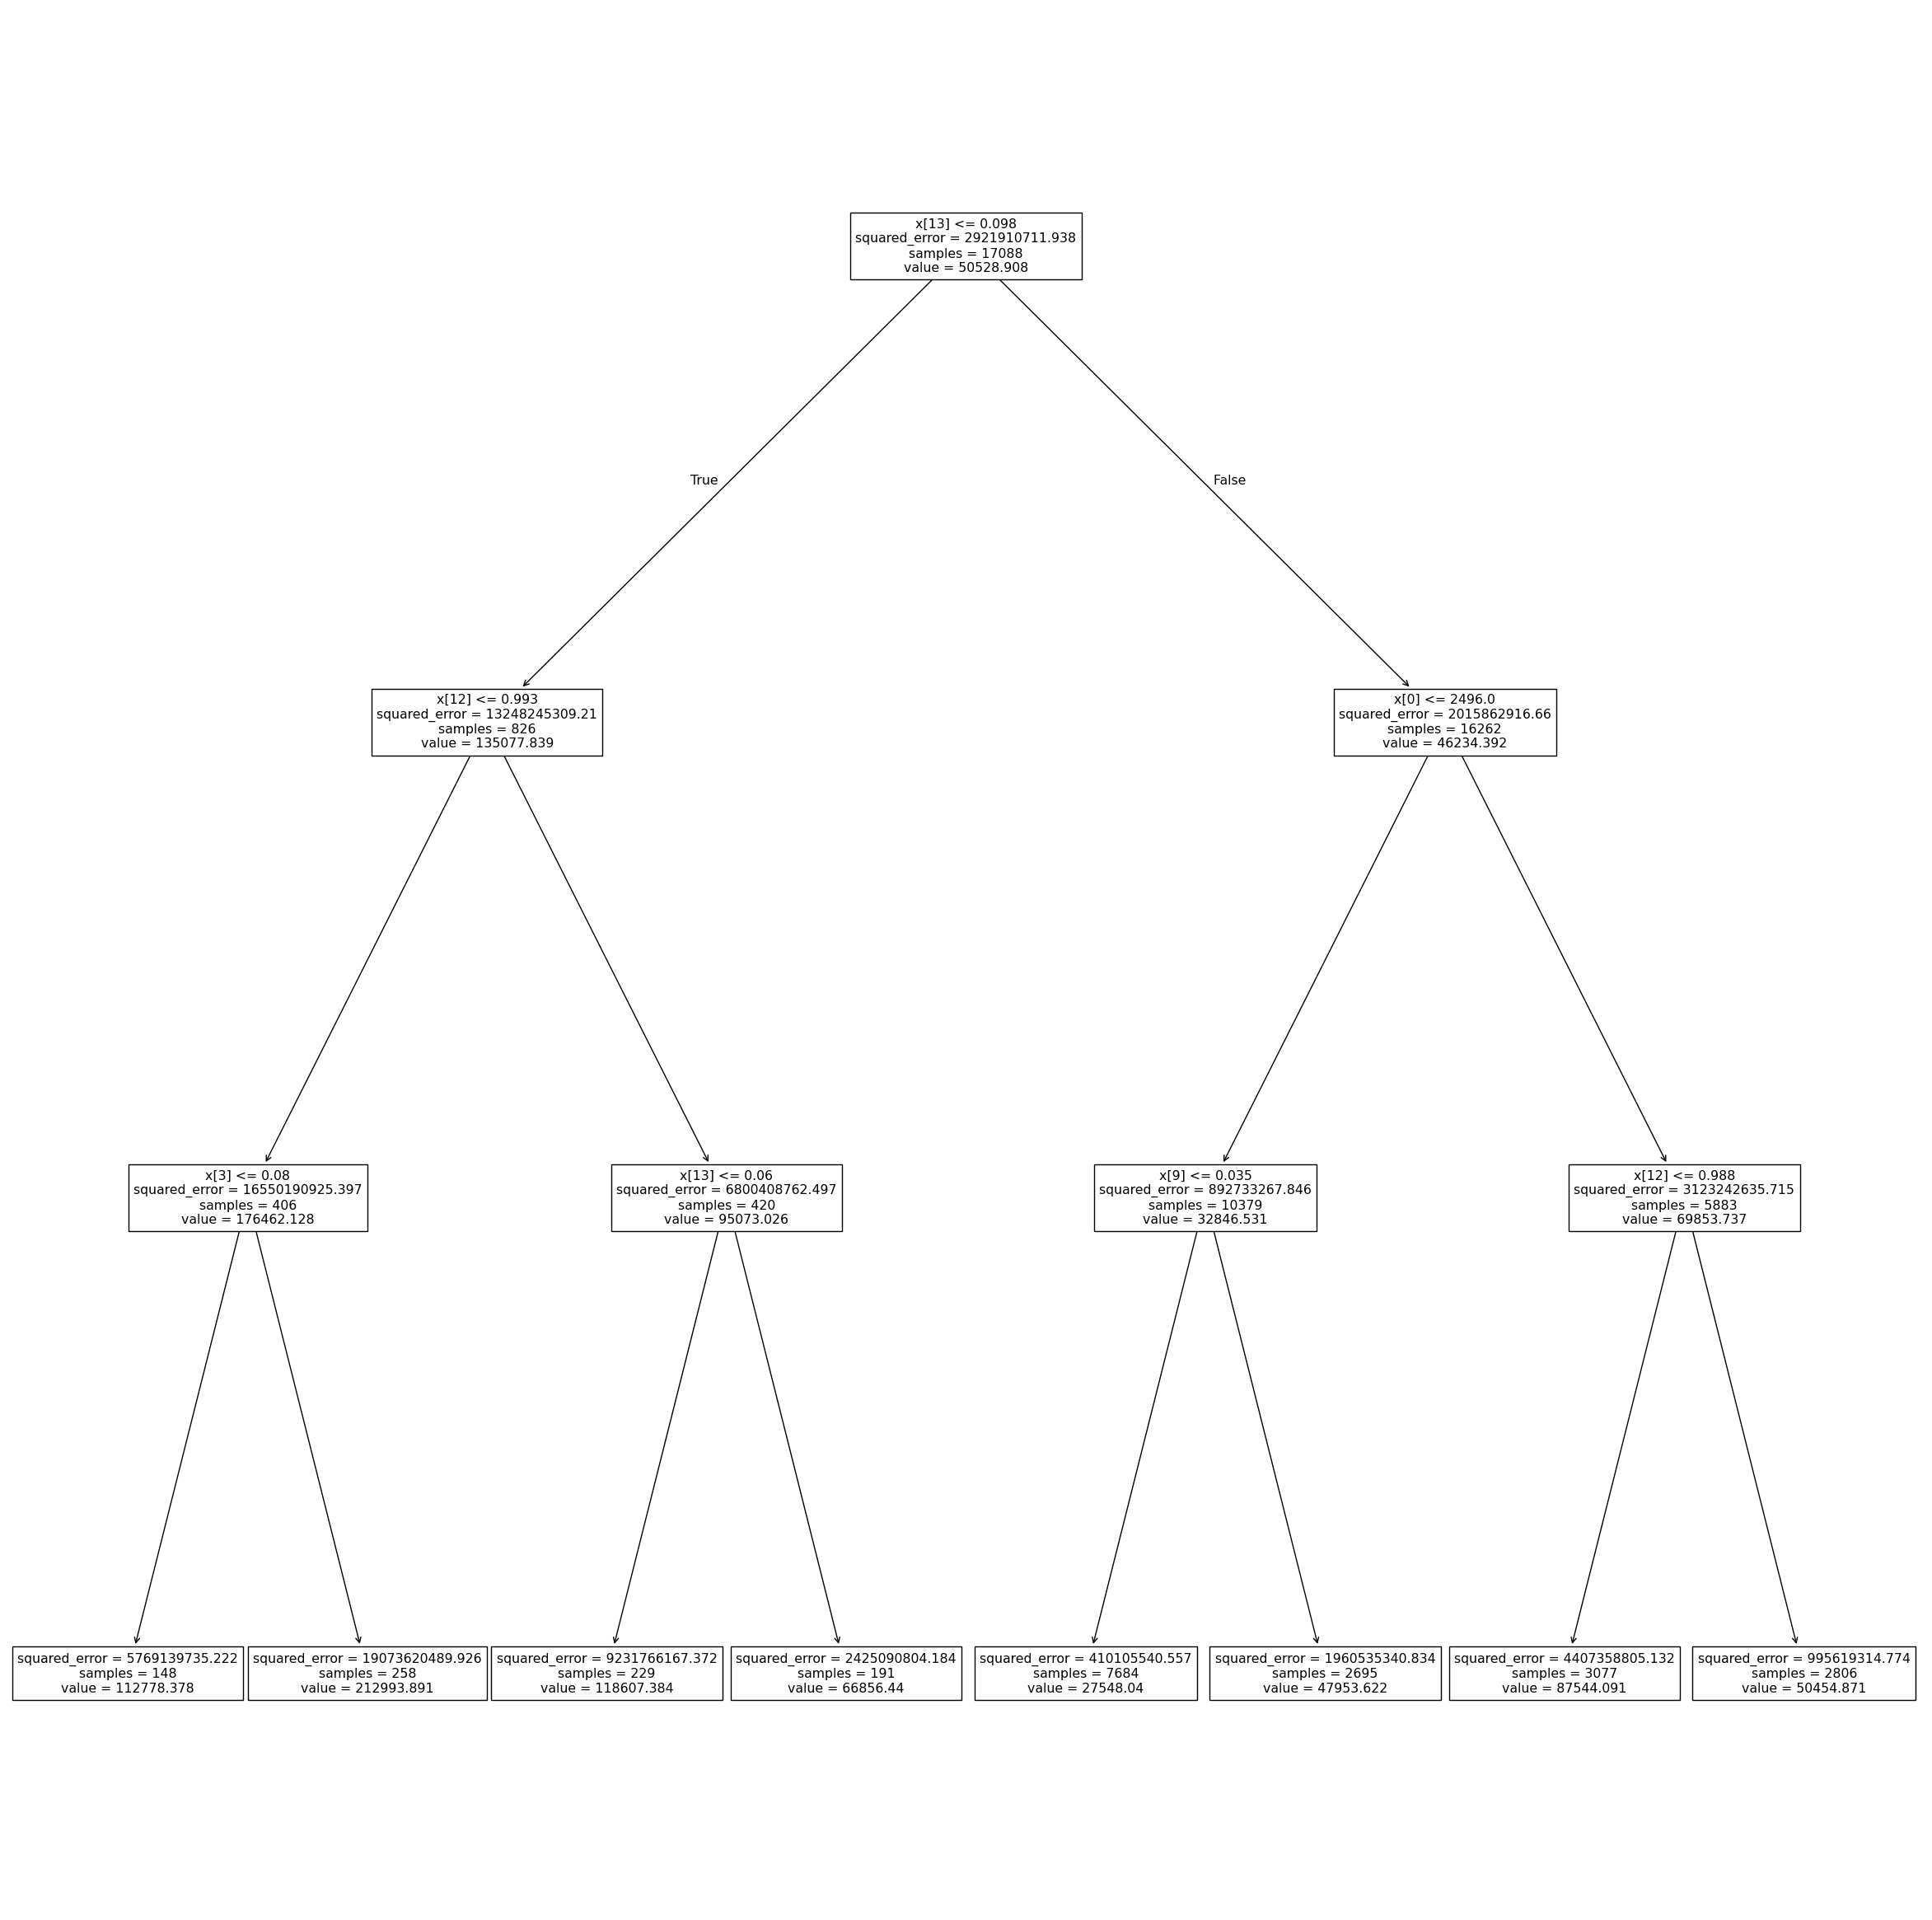

In [115]:
plt.figure(figsize=(30,30))
_ = plot_tree(regression_tree)